## Observations and Insights

- There is a close relation between the weight of the mouse and the average volume of the tumor, this may be because a bigger has more tissue that can be affected by the tumor
- For atleast one mouse (s185) the Capomulin regimen successfuly reduced the sice of the tumor, but we need to check if all of the mice that were treated with Capomulin algo got their tumors reduced to declare that the treatment works
- The possible outlier for Infubinol is 36.32 mm3 while the lower bound is 36.8 mm3, we might think that there is not much difference and not consider this one as an outlier, but only an expert can be sure if it is an outlier or not

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data=mouse_metadata.merge(study_results, on='Mouse ID' )
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
treatments=complete_data['Drug Regimen'].unique()
print(treatments)
mean=[]
median=[]
variance=[]
stdev=[]
SEM=[]

for treatment in treatments:
    treatment_data=complete_data[complete_data['Drug Regimen']==treatment]
    
    mean.append(treatment_data['Tumor Volume (mm3)'].mean())
    median.append(treatment_data['Tumor Volume (mm3)'].median())
    variance.append(treatment_data['Tumor Volume (mm3)'].var())
    stdev.append(treatment_data['Tumor Volume (mm3)'].std())
    SEM.append(treatment_data['Tumor Volume (mm3)'].sem())

# Creates a new DataFrame with the calculated information
# summary_statistics=pd.DataFrame([[treatments,mean,median,variance,stdev,SEM]],
#                                  columns=["Treatments","Mean","Median","Variance","Standard Deviation","SEM"])
summary_statistics = pd.DataFrame({'Treatments': treatments,'Mean': mean,'Median': median, 'Variance':variance, 'Standard Deviation':stdev, 'SEM':SEM}).set_index('Treatments')

for column in summary_statistics:
    summary_statistics[column]= summary_statistics[column].map('{:,.2f}'.format)

# Displays the results DataFrame
summary_statistics.sort_values(by='Treatments', ascending=True)


['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


,Mean,Median,Variance,Standard Deviation,SEM
Treatments,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

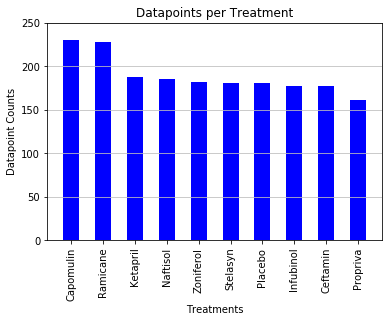

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

treatment_data=complete_data['Drug Regimen'].value_counts().rename_axis('treatments').reset_index(name='counts')
plt.bar(treatment_data['treatments'],treatment_data['counts'],color='b',width=0.5)
plt.xticks(rotation=90)
plt.xlim(-0.75, len(treatment_data['treatments'])-0.25)
plt.ylim(0, 250)
plt.title('Datapoints per Treatment')
plt.ylabel('Datapoint Counts')
plt.xlabel('Treatments')
plt.grid(axis='y', color='0.75')
plt.show()

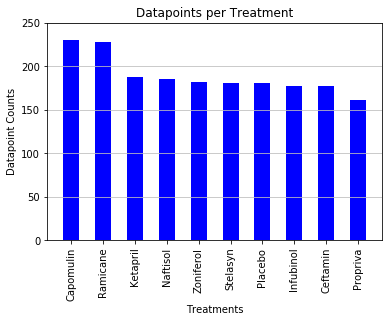

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
complete_data['Drug Regimen'].value_counts().plot(kind='bar',color='b')
plt.title('Datapoints per Treatment')
plt.xlim(-0.75, len(treatment_data['treatments'])-0.25)
plt.ylim(0, 250)
plt.ylabel('Datapoint Counts')
plt.xlabel('Treatments')
plt.grid(axis='y', color='0.75')
plt.show()

## Pie plots

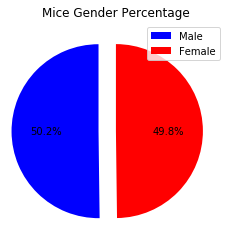

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data=complete_data.groupby(['Mouse ID','Sex']).sum().reset_index()['Sex'].value_counts().rename_axis('sex').reset_index(name='counts')
plt.pie(gender_data['counts'],explode=[0.2,0],startangle=90,colors=['b','r'],autopct='%1.1f%%')
plt.title('Mice Gender Percentage')
plt.legend(labels=gender_data['sex'], loc="best")
plt.show()

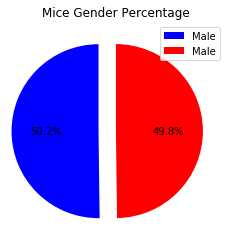

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
complete_data.groupby(['Mouse ID','Sex']).sum().reset_index()['Sex'].value_counts().rename_axis('sex').reset_index(name='counts')['counts'].plot(kind='pie',explode=[0.2,0],startangle=90,colors=['b','r'],autopct='%1.1f%%',legend='',labels=None)
plt.legend(labels=complete_data['Sex'], loc="best")
plt.title('Mice Gender Percentage')
plt.ylabel('')
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the IQR and quantitatively determine if there are any potential outliers.


treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


max_timepoint=complete_data.set_index('Drug Regimen').drop(['Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Propriva']).groupby(['Mouse ID','Drug Regimen'])['Timepoint'].max()


final_tumor = pd.merge(max_timepoint, complete_data,  how='left', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint']).drop(columns=['Sex','Age_months','Weight (g)','Metastatic Sites'])


for treatment in treatments:
    
    outliers=0
    
    outlier=[]
    
    tumors = final_tumor[final_tumor['Drug Regimen']==treatment]
    
    
    drug = tumors['Tumor Volume (mm3)']

    quartiles = drug.quantile([.25,.5,.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3-Q1
    
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)

    for volume in tumors['Tumor Volume (mm3)']:
        
        
        if volume > upper_bound or volume < lower_bound:
            
            outlier.append('{:.2f}'.format(volume))
            outliers +=1

    print(f'-------------------------{treatment}-------------------------\n')
    print(f"The lower quartile of temperatures is: {'{:.2f}'.format(Q1)}")
    print(f"The upper quartile of temperatures is: {'{:.2f}'.format(Q3)}")
    print(f"The interquartile range of temperatures is: {'{:.2f}'.format(IQR)}")
    print(f"The the median of temperatures is: {'{:.2f}'.format(quartiles[0.5])} ")
    print(f"Values below {'{:.2f}'.format(lower_bound)} could be outliers.")
    print(f"Values above {'{:.2f}'.format(upper_bound)} could be outliers.")

    if outliers==1:
          
        print(f"There is {outliers} possible outlier: {outlier}\n")
          
    elif outliers>1:
          
        print(f"There are {outliers} possible outliers: {outlier}\n")
              
    elif outliers==0:
              
        print("There are no outliers\n")
        

-------------------------Capomulin-------------------------

The lower quartile of temperatures is: 32.38
The upper quartile of temperatures is: 40.16
The interquartile range of temperatures is: 7.78
The the median of temperatures is: 38.13 
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.
There are no outliers

-------------------------Ramicane-------------------------

The lower quartile of temperatures is: 31.56
The upper quartile of temperatures is: 40.66
The interquartile range of temperatures is: 9.10
The the median of temperatures is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
There are no outliers

-------------------------Infubinol-------------------------

The lower quartile of temperatures is: 54.05
The upper quartile of temperatures is: 65.53
The interquartile range of temperatures is: 11.48
The the median of temperatures is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


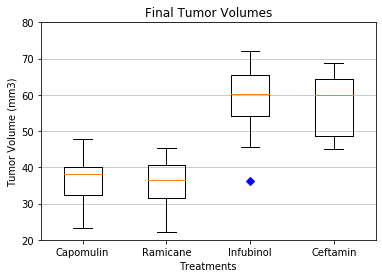

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volumes=[]

for treatment in treatments:
    
    tumors = final_tumor[final_tumor['Drug Regimen']==treatment]
    tumor_volumes.append(tumors['Tumor Volume (mm3)'])
    
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Treatments')
ax1.boxplot(tumor_volumes, 0, 'bD')
plt.xticks([1,2,3,4], treatments)
plt.ylim(20, 80)
plt.grid(axis='y', color='0.75')
plt.show()

## Line and scatter plots

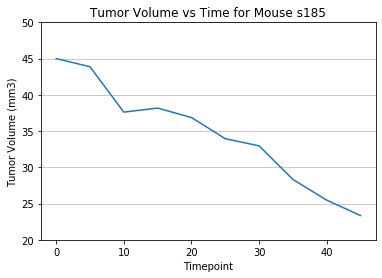

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#line_data=complete_data.set_index('Drug Regimen').drop(index=['Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva'])
line_data=complete_data[complete_data['Drug Regimen']=='Capomulin']
line_data=line_data[line_data['Mouse ID']=='s185']
plt.plot(line_data['Timepoint'],line_data['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs Time for Mouse s185')
plt.ylim(20, 50)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.grid(axis='y', color='0.75')
plt.show()

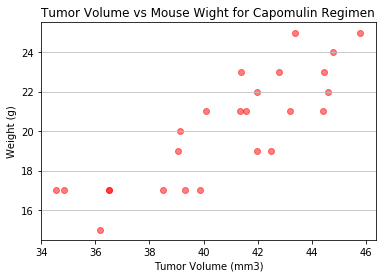

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_data=complete_data.loc[complete_data['Drug Regimen']=='Capomulin']
capomulin_data=capomulin_data.groupby('Mouse ID').mean()
plt.scatter(capomulin_data['Tumor Volume (mm3)'], capomulin_data['Weight (g)'], c='r', alpha=0.5)
plt.title('Tumor Volume vs Mouse Wight for Capomulin Regimen')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.grid(axis='y', color='0.75')
plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
corr_data=capomulin_data.drop(columns=['Age_months','Timepoint','Metastatic Sites']).reset_index()
pearsoncorr = corr_data.corr(method='pearson')
pearsoncorr

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


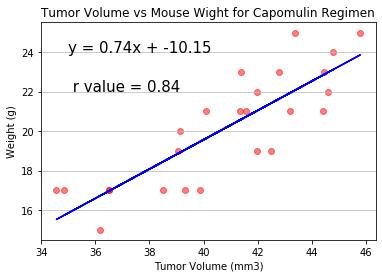

In [12]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(corr_data['Tumor Volume (mm3)'], corr_data['Weight (g)'])
regress_values = corr_data['Tumor Volume (mm3)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rval=f' r value = {"{:.2f}".format(rvalue)}'

plt.scatter(capomulin_data['Tumor Volume (mm3)'], capomulin_data['Weight (g)'], c='r', alpha=0.5)
plt.title('Tumor Volume vs Mouse Wight for Capomulin Regimen')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.grid(axis='y', color='0.75')
plt.plot(corr_data['Tumor Volume (mm3)'],regress_values,"b")
plt.annotate(line_eq,(35,24),fontsize=15,color="black")
plt.annotate(rval,(35,22),fontsize=15,color="black")
plt.show()